In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# to see all the comands result in a single kernal 
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#Approach_01
# just found 1 date leak and get result as 92.47 with rank of 7 on public leader board
# i have seen that around 89% of date IDs are repeated to merge test and train data sort them with ids and 
# given next outcome value to current one and fill missing value with D 

In [5]:
# Approach_02
# make an model and 
# if the same id is not present in test data set then fill its value by predicted value 

In [6]:
#Upload data
train = pd.read_csv(r'C:\Users\hp\Desktop\Machine_learning_project\Customer_Segmentation\Train.csv')
test = pd.read_csv(r'C:\Users\hp\Desktop\Machine_learning_project\Customer_Segmentation\Test.csv')
sample_submmission = pd.read_csv(r'C:\Users\hp\Desktop\Machine_learning_project\Customer_Segmentation\sample_submission.csv')
train.shape
test.shape
sample_submmission.shape

(8068, 11)

(2627, 10)

(2627, 2)

In [7]:
train['ID'].nunique()
test['ID'].nunique()

8068

2627

In [8]:
train['is_train']=1
test['is_train']=0

In [9]:
df=pd.concat([train,test],axis=0)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [10]:
df.shape

(10695, 12)

In [11]:
df['ID'].nunique()

8363

In [12]:
# now we get approx 89 %(2332 observations) data is copied so we have predict only on other part of data
# assuming outcome remain same if row no. is same

In [13]:
#df_1=pd.merge(train,test,how='inner',left_on='ID' ,right_on='ID')

In [14]:
#df_1.shape

In [15]:
train.sort_values(by=['ID'],inplace=True)
test.sort_values(by=['ID'],inplace=True)
train.head()
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,is_train
0,458982,Male,Yes,61,Yes,Executive,1.0,High,3.0,Cat_6,C,1
1,458983,Female,Yes,63,Yes,Executive,0.0,High,5.0,Cat_6,C,1
2,458984,Male,Yes,39,Yes,Artist,0.0,Average,3.0,Cat_6,C,1
3,458985,Male,No,23,No,Healthcare,1.0,Low,4.0,Cat_6,D,1
4,458986,Male,No,18,No,Healthcare,7.0,Low,4.0,Cat_6,D,1


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,is_train
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,0
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,0
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,0
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,0
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,0


In [16]:
df.sort_values(by=['ID','is_train'],inplace=True)
df.head()

,Age,Ever_Married,Family_Size,Gender,Graduated,ID,Profession,Segmentation,Spending_Score,Var_1,Work_Experience,is_train
0,61,Yes,3.0,Male,Yes,458982,Executive,C,High,Cat_6,1.0,1
1,63,Yes,5.0,Female,Yes,458983,Executive,C,High,Cat_6,0.0,1
2,39,Yes,3.0,Male,Yes,458984,Artist,C,Average,Cat_6,0.0,1
3,23,No,4.0,Male,No,458985,Healthcare,D,Low,Cat_6,1.0,1
4,18,No,4.0,Male,No,458986,Healthcare,D,Low,Cat_6,7.0,1


In [17]:
 df['Segmentation_output'] = df['Segmentation'].shift(-1)

In [18]:
Encoding = df.groupby('ID').size()
df['ID_Freq_encoded']= df.ID.map(Encoding)

In [19]:
df.head()

,Age,Ever_Married,Family_Size,Gender,Graduated,ID,Profession,Segmentation,Spending_Score,Var_1,Work_Experience,is_train,Segmentation_output,ID_Freq_encoded
0,61,Yes,3.0,Male,Yes,458982,Executive,C,High,Cat_6,1.0,1,C,1
1,63,Yes,5.0,Female,Yes,458983,Executive,C,High,Cat_6,0.0,1,C,1
2,39,Yes,3.0,Male,Yes,458984,Artist,C,Average,Cat_6,0.0,1,D,1
3,23,No,4.0,Male,No,458985,Healthcare,D,Low,Cat_6,1.0,1,D,1
4,18,No,4.0,Male,No,458986,Healthcare,D,Low,Cat_6,7.0,1,C,1


In [20]:
out=df[df['is_train']==0]

In [21]:
out.shape
out.info()

(2627, 14)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 0 to 2626
Data columns (total 14 columns):
Age                    2627 non-null int64
Ever_Married           2577 non-null object
Family_Size            2514 non-null float64
Gender                 2627 non-null object
Graduated              2603 non-null object
ID                     2627 non-null int64
Profession             2589 non-null object
Segmentation           0 non-null object
Spending_Score         2627 non-null object
Var_1                  2595 non-null object
Work_Experience        2358 non-null float64
is_train               2627 non-null int64
Segmentation_output    2532 non-null object
ID_Freq_encoded        2627 non-null int64
dtypes: float64(2), int64(4), object(8)
memory usage: 307.9+ KB


In [22]:
out['Segmentation_output']=out['Segmentation_output'].fillna('D')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
col=['ID','ID_Freq_encoded','Segmentation_output']

In [24]:
out_1=out[col]

In [25]:
out_1.head()
out_1.describe().T

,ID,ID_Freq_encoded,Segmentation_output
0,458989,2,B
1,458994,2,C
2,458996,2,A
3,459000,2,C
4,459001,2,C


,count,mean,std,min,25%,50%,75%,max
ID,2627.0,463433.918919,2618.245698,458989.0,461162.5,463379.0,465696.0,467968.0
ID_Freq_encoded,2627.0,1.887705,0.315790,1.0,2.0,2.0,2.0,2.0


In [26]:
sample_submmission.head()

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A


In [27]:
#out_1 = out_1.rename(columns={'Segmentation_output': 'Segmentation'})

In [28]:
#out_1.to_csv("1st_try.csv", index = False)

# Second Approach

In [29]:
df.head(40)

,Age,Ever_Married,Family_Size,Gender,Graduated,ID,Profession,Segmentation,Spending_Score,Var_1,Work_Experience,is_train,Segmentation_output,ID_Freq_encoded
0,61,Yes,3.0,Male,Yes,458982,Executive,C,High,Cat_6,1.0,1,C,1
1,63,Yes,5.0,Female,Yes,458983,Executive,C,High,Cat_6,0.0,1,C,1
2,39,Yes,3.0,Male,Yes,458984,Artist,C,Average,Cat_6,0.0,1,D,1
3,23,No,4.0,Male,No,458985,Healthcare,D,Low,Cat_6,1.0,1,D,1
4,18,No,4.0,Male,No,458986,Healthcare,D,Low,Cat_6,7.0,1,C,1
5,72,Yes,2.0,Female,Yes,458987,Lawyer,C,High,Cat_6,0.0,1,D,1
6,29,No,3.0,Female,No,458988,Marketing,D,Low,Cat_6,2.0,1,NaN,1
0,36,Yes,1.0,Female,Yes,458989,Engineer,NaN,Low,Cat_6,0.0,0,B,2
7,42,Yes,1.0,Female,Yes,458989,Engineer,B,Low,Cat_6,1.0,1,D,2
8,71,Yes,3.0,Female,No,458990,Lawyer,D,High,Cat_6,1.0,1,A,1


In [30]:
# All unmaried spend less


In [31]:
df['Ever_Married']=df['Ever_Married'].replace({'Yes':1,'No':0})
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df['Graduated']=df['Graduated'].replace({'Yes':1,'No':0})
df['Spending_Score']=df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})
df['Segmentation_01']=df['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3})
# df['Var_1']=df['Var_1'].str[-1:]

In [32]:
df['gen_mar']=df['Gender']+2*df['Ever_Married']
df['gen_grad']=df['Gender']+2*df['Graduated']
df['gen_spend']=df['Gender']+3*df['Spending_Score']
df['grad_spend']=df['Graduated']+3*df['Spending_Score']
df['grad_spend_gen']=df['Graduated']+3*df['Spending_Score']+9*df['Gender']

In [33]:
df.isna().sum()

Age                       0
Ever_Married            190
Family_Size             448
Gender                    0
Graduated               102
ID                        0
Profession              162
Segmentation           2627
Spending_Score            0
Var_1                   108
Work_Experience        1098
is_train                  0
Segmentation_output    2628
ID_Freq_encoded           0
Segmentation_01        2627
gen_mar                 190
gen_grad                102
gen_spend                 0
grad_spend              102
grad_spend_gen          102
dtype: int64

In [34]:
train.corr()

,ID,Age,Work_Experience,Family_Size,is_train
ID,1.000000,-0.005055,-0.030688,0.011801,NaN
Age,-0.005055,1.000000,-0.190789,-0.280517,NaN
Work_Experience,-0.030688,-0.190789,1.000000,-0.063234,NaN
Family_Size,0.011801,-0.280517,-0.063234,1.000000,NaN
is_train,NaN,NaN,NaN,NaN,NaN


In [35]:
df.head()

,Age,Ever_Married,Family_Size,Gender,Graduated,ID,Profession,Segmentation,Spending_Score,Var_1,Work_Experience,is_train,Segmentation_output,ID_Freq_encoded,Segmentation_01,gen_mar,gen_grad,gen_spend,grad_spend,grad_spend_gen
0,61,1.0,3.0,1,1.0,458982,Executive,C,2,Cat_6,1.0,1,C,1,2.0,3.0,3.0,7,7.0,16.0
1,63,1.0,5.0,0,1.0,458983,Executive,C,2,Cat_6,0.0,1,C,1,2.0,2.0,2.0,6,7.0,7.0
2,39,1.0,3.0,1,1.0,458984,Artist,C,1,Cat_6,0.0,1,D,1,2.0,3.0,3.0,4,4.0,13.0
3,23,0.0,4.0,1,0.0,458985,Healthcare,D,0,Cat_6,1.0,1,D,1,3.0,1.0,1.0,1,0.0,9.0
4,18,0.0,4.0,1,0.0,458986,Healthcare,D,0,Cat_6,7.0,1,C,1,3.0,1.0,1.0,1,0.0,9.0


# Visulization

In [36]:
train.head(10)
train.nunique()
train['Segmentation'].value_counts()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,is_train
0,458982,Male,Yes,61,Yes,Executive,1.0,High,3.0,Cat_6,C,1
1,458983,Female,Yes,63,Yes,Executive,0.0,High,5.0,Cat_6,C,1
2,458984,Male,Yes,39,Yes,Artist,0.0,Average,3.0,Cat_6,C,1
3,458985,Male,No,23,No,Healthcare,1.0,Low,4.0,Cat_6,D,1
4,458986,Male,No,18,No,Healthcare,7.0,Low,4.0,Cat_6,D,1
5,458987,Female,Yes,72,Yes,Lawyer,0.0,High,2.0,Cat_6,C,1
6,458988,Female,No,29,No,Marketing,2.0,Low,3.0,Cat_6,D,1
7,458989,Female,Yes,42,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
8,458990,Female,Yes,71,No,Lawyer,1.0,High,3.0,Cat_6,D,1
9,458991,Female,Yes,84,Yes,Lawyer,3.0,High,2.0,Cat_6,A,1


ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
is_train              1
dtype: int64

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [37]:
train.describe().T
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,1.0,4.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.00,3.0,4.00,9.0
is_train,8068.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


,count,mean,std,min,25%,50%,75%,max
ID,2627.0,463433.918919,2618.245698,458989.0,461162.5,463379.0,465696.0,467968.0
Age,2627.0,43.649791,16.967015,18.0,30.0,41.0,53.0,89.0
Work_Experience,2358.0,2.552587,3.341094,0.0,0.0,1.0,4.0,14.0
Family_Size,2514.0,2.825378,1.551906,1.0,2.0,2.0,4.0,9.0
is_train,2627.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [38]:
train.isna().sum()
test.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
is_train             0
dtype: int64

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
is_train             0
dtype: int64

In [39]:
train['Ever_Married']=train['Ever_Married'].replace({'Yes':1,'No':0})
train['Gender']=train['Gender'].replace({'Male':1,'Female':0})
train['Graduated']=train['Graduated'].replace({'Yes':1,'No':0})
train['Spending_Score']=train['Spending_Score'].replace({'Low':0,'Average':1,'High':2})
train['Segmentation_01']=train['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3})

In [40]:
train['gen_mar']=train['Gender']+2*train['Ever_Married']
train['gen_grad']=train['Gender']+2*train['Graduated']
train['gen_spend']=train['Gender']+3*train['Spending_Score']
train['grad_spend']=train['Graduated']+3*train['Spending_Score']
train['grad_spend_gen']=train['Graduated']+3*train['Spending_Score']+9*train['Gender']

In [41]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,is_train,Segmentation_01,gen_mar,gen_grad,gen_spend,grad_spend,grad_spend_gen
0,458982,1,1.0,61,1.0,Executive,1.0,2,3.0,Cat_6,C,1,2,3.0,3.0,7,7.0,16.0
1,458983,0,1.0,63,1.0,Executive,0.0,2,5.0,Cat_6,C,1,2,2.0,2.0,6,7.0,7.0
2,458984,1,1.0,39,1.0,Artist,0.0,1,3.0,Cat_6,C,1,2,3.0,3.0,4,4.0,13.0
3,458985,1,0.0,23,0.0,Healthcare,1.0,0,4.0,Cat_6,D,1,3,1.0,1.0,1,0.0,9.0
4,458986,1,0.0,18,0.0,Healthcare,7.0,0,4.0,Cat_6,D,1,3,1.0,1.0,1,0.0,9.0


In [42]:
train.groupby(['Spending_Score','Segmentation'], as_index=False).count()

,Spending_Score,Segmentation,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,is_train,Segmentation_01,gen_mar,gen_grad,gen_spend,grad_spend,grad_spend_gen
0,0,A,1358,1358,1343,1358,1342,1340,1248,1278,1345,1358,1358,1343,1342,1358,1342,1342
1,0,B,884,884,872,884,877,875,808,853,880,884,884,872,877,884,877,877
2,0,C,662,662,650,662,656,653,606,634,651,662,662,650,656,662,656,656
3,0,D,1974,1974,1950,1974,1957,1931,1743,1838,1953,1974,1974,1950,1957,1974,1957,1957
4,1,A,343,343,332,343,340,332,300,338,339,343,343,332,340,343,340,340
5,1,B,590,590,577,590,582,580,526,585,586,590,590,577,582,590,582,582
6,1,C,903,903,894,903,896,895,831,891,895,903,903,894,896,903,896,896
7,1,D,138,138,134,138,135,133,108,129,137,138,138,134,135,138,135,135
8,2,A,271,271,263,271,266,267,230,261,269,271,271,263,266,271,266,266
9,2,B,384,384,378,384,381,381,332,377,379,384,384,378,381,384,381,381


In [43]:
train.groupby(['Work_Experience','Segmentation'], as_index=False).count()

,Work_Experience,Segmentation,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,is_train,Segmentation_01,gen_mar,gen_grad,gen_spend,grad_spend,grad_spend_gen
0,0.0,A,542,542,529,542,538,533,542,518,536,542,542,529,538,542,538,538
1,0.0,B,558,558,551,558,554,550,558,547,555,558,558,551,554,558,554,554
2,0.0,C,619,619,613,619,616,614,619,604,612,619,619,613,616,619,616,616
3,0.0,D,599,599,588,599,594,585,599,560,592,599,599,588,594,599,594,594
4,1.0,A,578,578,571,578,573,567,578,551,573,578,578,571,573,578,573,573
5,1.0,B,571,571,563,571,568,566,571,555,567,571,571,563,568,571,568,568
6,1.0,C,628,628,620,628,625,625,628,619,622,628,628,620,625,628,625,625
7,1.0,D,577,577,565,577,572,568,577,554,571,577,577,565,572,577,572,572
8,2.0,A,63,63,63,63,61,62,63,57,62,63,63,63,61,63,61,61
9,2.0,B,60,60,59,60,58,60,60,60,60,60,60,59,58,60,58,58


In [44]:
train.groupby(['Var_1','Segmentation'], as_index=False).count()

,Var_1,Segmentation,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,is_train,Segmentation_01,gen_mar,gen_grad,gen_spend,grad_spend,grad_spend_gen
0,Cat_1,A,31,31,30,31,30,31,28,31,28,31,31,30,30,31,30,30
1,Cat_1,B,26,26,25,26,26,26,22,26,25,26,26,25,26,26,26,26
2,Cat_1,C,26,26,26,26,26,26,25,26,24,26,26,26,26,26,26,26
3,Cat_1,D,50,50,49,50,50,48,40,50,47,50,50,49,50,50,50,50
4,Cat_2,A,83,83,83,83,82,83,75,83,78,83,83,83,82,83,82,82
5,Cat_2,B,106,106,103,106,104,104,97,106,104,106,106,103,104,106,104,104
6,Cat_2,C,99,99,95,99,98,99,91,99,99,99,99,95,98,99,98,98
7,Cat_2,D,134,134,131,134,133,134,125,134,129,134,134,131,133,134,133,133
8,Cat_3,A,223,223,214,223,218,214,201,223,215,223,223,214,218,223,218,218
9,Cat_3,B,186,186,182,186,184,184,161,186,178,186,186,182,184,186,184,184


In [45]:
train.groupby(['Profession','Segmentation'], as_index=False).count()

,Profession,Segmentation,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,is_train,Segmentation_01,gen_mar,gen_grad,gen_spend,grad_spend,grad_spend_gen
0,Artist,A,558,558,553,558,555,506,558,529,554,558,558,553,555,558,555,555
1,Artist,B,756,756,744,756,750,690,756,744,747,756,756,744,750,756,750,750
2,Artist,C,1065,1065,1054,1065,1060,989,1065,1044,1054,1065,1065,1054,1060,1065,1060,1060
3,Artist,D,137,137,136,137,137,120,137,130,136,137,137,136,137,137,137,137
4,Doctor,A,199,199,195,199,196,181,199,191,196,199,199,195,196,199,196,196
5,Doctor,B,143,143,141,143,142,133,143,139,143,143,143,141,142,143,142,142
6,Doctor,C,140,140,139,140,140,129,140,136,139,140,140,139,140,140,140,140
7,Doctor,D,206,206,202,206,205,187,206,196,205,206,206,202,205,206,205,205
8,Engineer,A,259,259,252,259,258,240,259,248,257,259,259,252,258,259,258,258
9,Engineer,B,189,189,183,189,187,171,189,184,188,189,189,183,187,189,187,187


In [ ]:
train.groupby(['Ever_Married','Segmentation'], as_index=False).count()

In [46]:
train.corr()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,is_train,Segmentation_01,gen_mar,gen_grad,gen_spend,grad_spend,grad_spend_gen
ID,1.000000,0.006155,0.021348,-0.005055,-0.011544,-0.030688,0.005773,0.011801,NaN,-0.009104,0.021102,-0.007566,0.006888,0.004445,0.007356
Gender,0.006155,1.000000,0.116135,0.030216,-0.034109,-0.059878,0.061432,0.055911,NaN,0.026403,0.530254,0.432295,0.274824,0.051349,0.892723
Ever_Married,0.021348,0.116135,1.000000,0.567130,0.196893,-0.097270,0.616406,-0.078658,NaN,-0.218508,0.903683,0.231685,0.618743,0.630316,0.384991
Age,-0.005055,0.030216,0.567130,1.000000,0.237309,-0.190789,0.415485,-0.280517,NaN,-0.243552,0.496284,0.227202,0.406758,0.447321,0.226409
Graduated,-0.011544,-0.034109,0.196893,0.237309,1.000000,0.031374,0.103468,-0.231260,NaN,-0.179233,0.152339,0.886462,0.092324,0.307594,0.109127
Work_Experience,-0.030688,-0.059878,-0.097270,-0.190789,0.031374,1.000000,-0.075194,-0.063234,NaN,0.012993,-0.107747,0.000631,-0.085270,-0.064923,-0.080842
Spending_Score,0.005773,0.061432,0.616406,0.415485,0.103468,-0.075194,1.000000,0.094092,NaN,-0.109837,0.552828,0.121654,0.976562,0.978237,0.494523
Family_Size,0.011801,0.055911,-0.078658,-0.280517,-0.231260,-0.063234,0.094092,1.000000,NaN,0.196213,-0.042274,-0.183204,0.102658,0.042154,0.067246
is_train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segmentation_01,-0.009104,0.026403,-0.218508,-0.243552,-0.179233,0.012993,-0.109837,0.196213,NaN,1.000000,-0.174841,-0.149065,-0.100114,-0.142067,-0.040347


C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


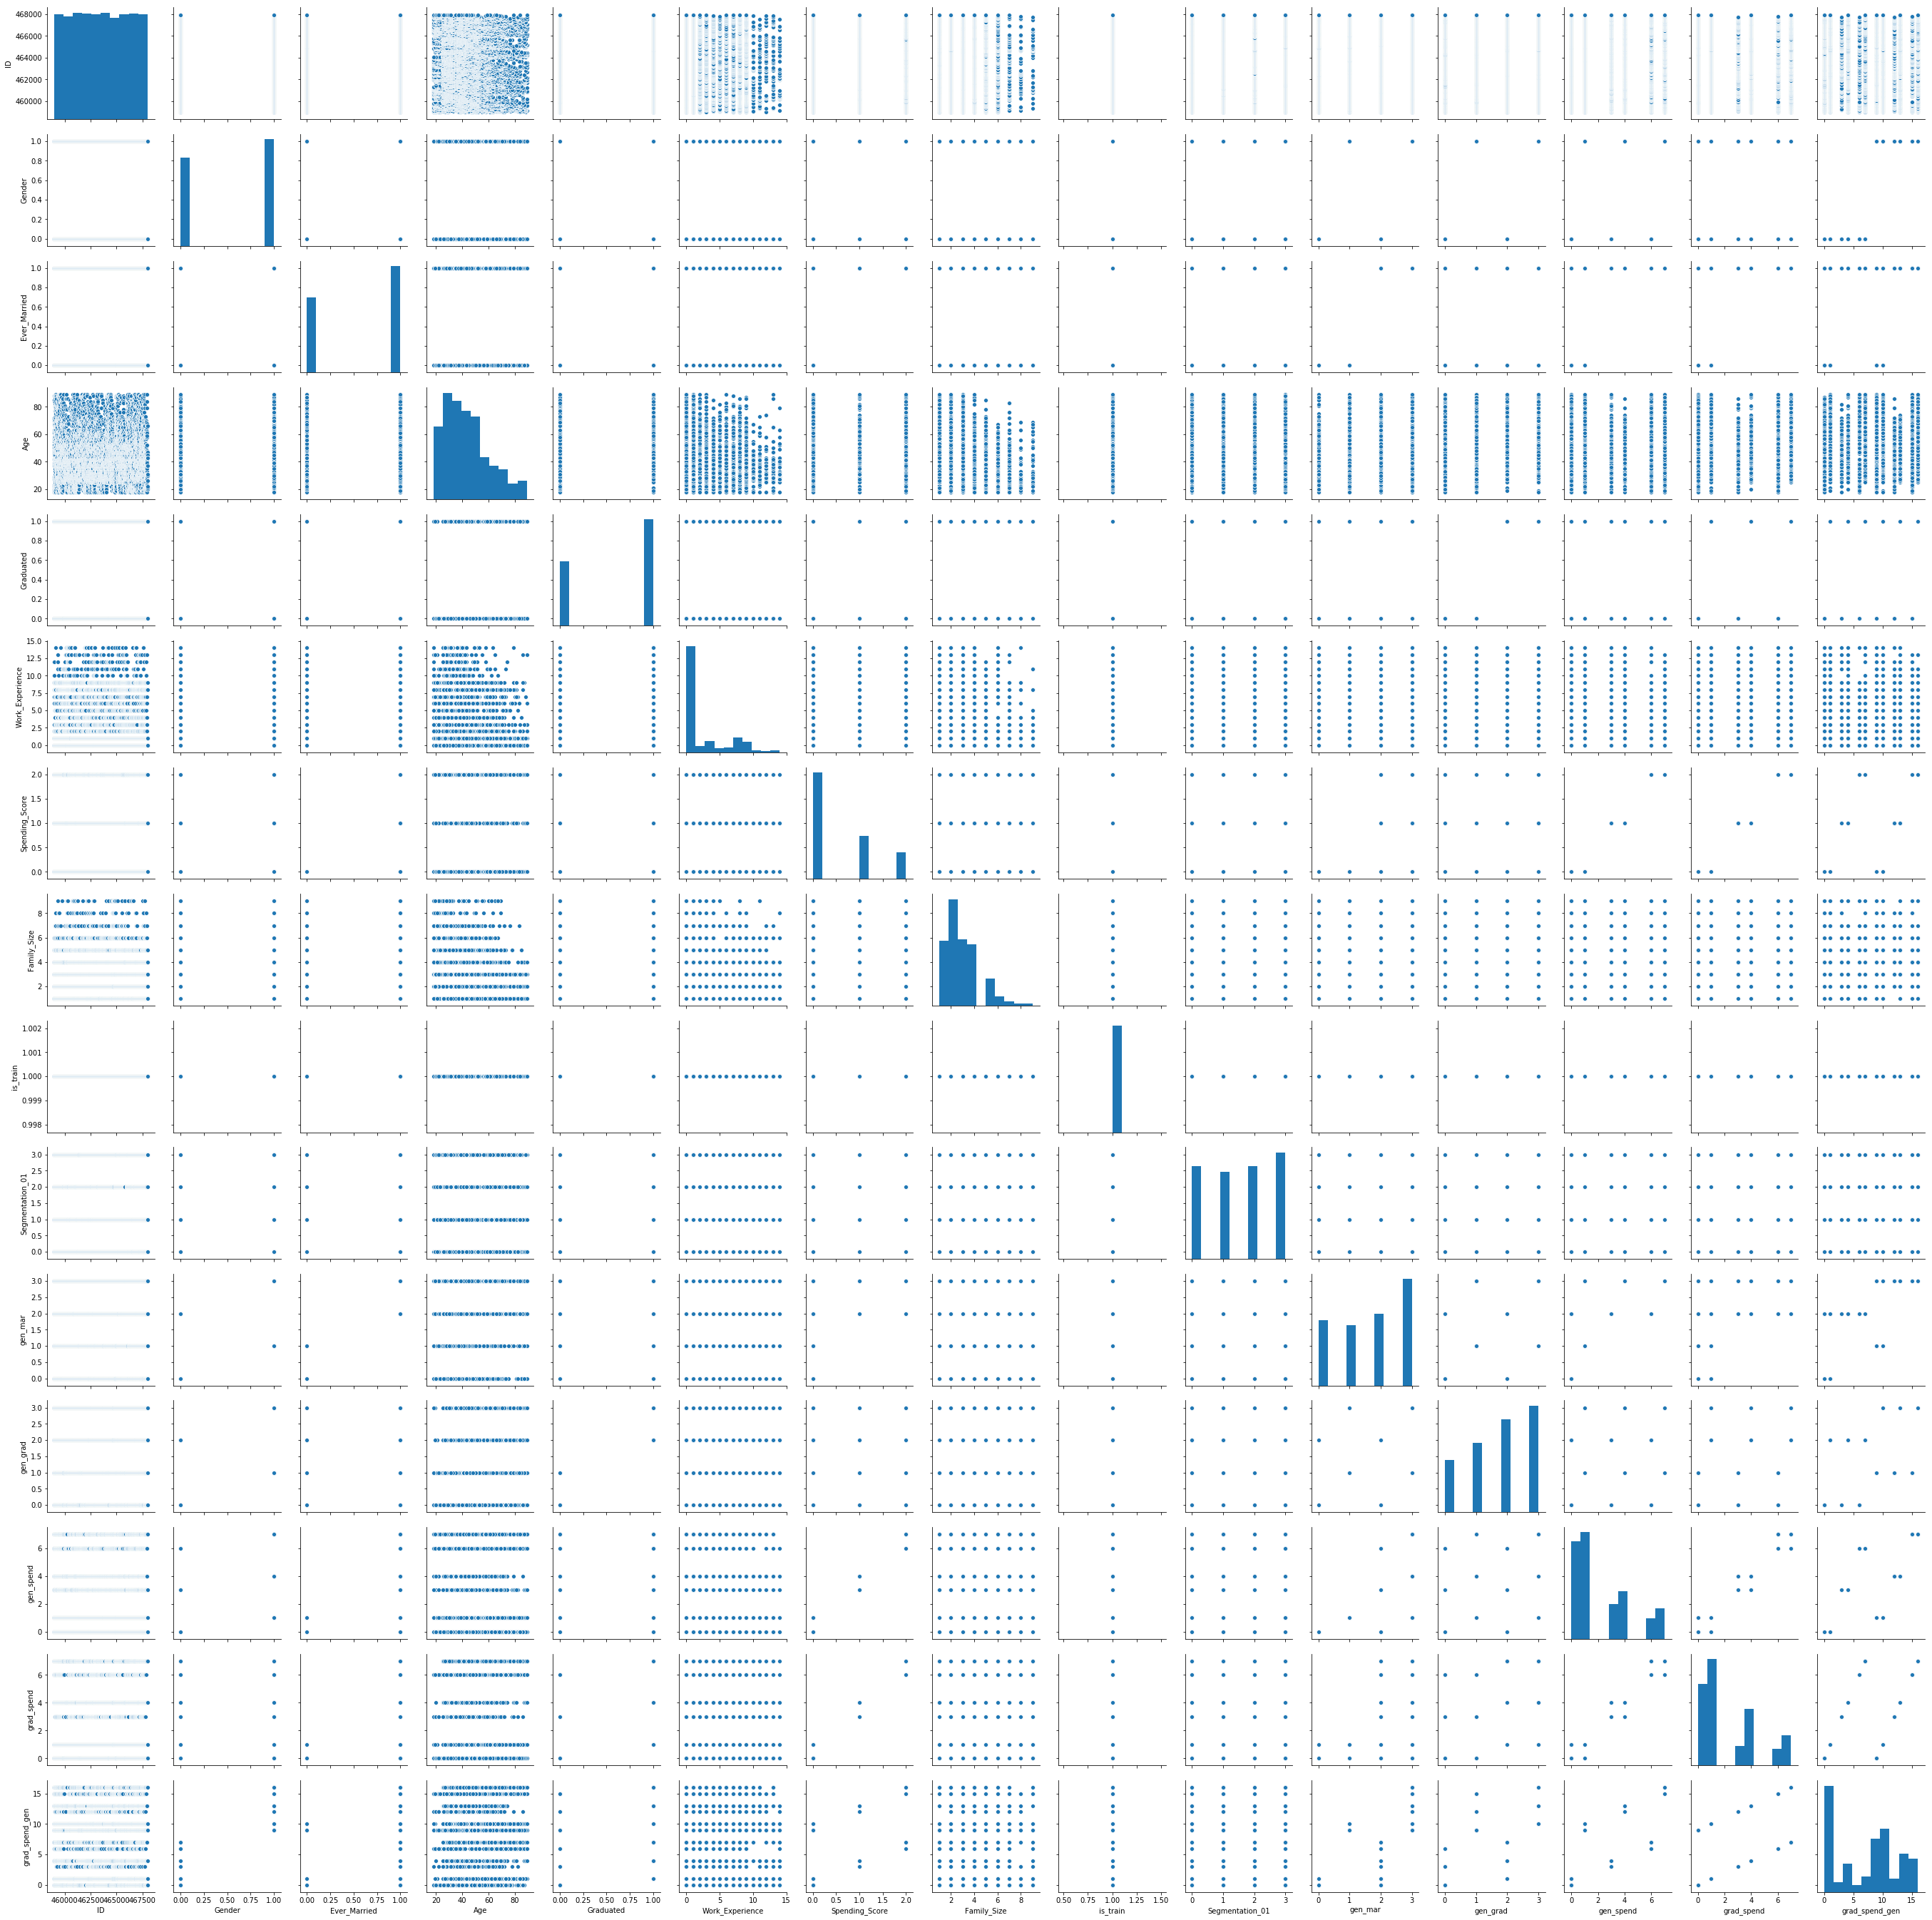

In [47]:
sns.pairplot(train)

In [48]:
# feature genration can be through have  1)work experience or not
# 2) missing value in particular column and total no of missing values
# 3) hot encode profession and Var_1 

In [49]:
# Y=train['Segmentation']
# train_df=train.drop("Segmentation",axis=1)

In [50]:
#pip install catboost

In [51]:
# # Cat Boost
# from sklearn.model_selection import train_test_split
# X_t, X_tt, y_t, y_tt = train_test_split(train_df, Y, test_size=.25, random_state=2)
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score
# catb = CatBoostClassifier(iterations=50)
#catb= catb.fit(X_t, y_t,eval_set=(X_tt , y_tt),eval_metric='multi_error',verbose=1)
# y_predict = catb.predict(X_tt)
# print(catb.score(X_t , y_t))
# print(catb.score(X_tt , y_tt))

In [52]:
# train['is_train']=1
# test['is_train']=0
# df=pd.concat([train, test])

In [53]:
df.columns

Index(['Age', 'Ever_Married', 'Family_Size', 'Gender', 'Graduated', 'ID', 'Profession', 'Segmentation', 'Spending_Score', 'Var_1', 'Work_Experience', 'is_train', 'Segmentation_output', 'ID_Freq_encoded', 'Segmentation_01', 'gen_mar', 'gen_grad', 'gen_spend', 'grad_spend', 'grad_spend_gen'], dtype='object')

In [54]:
df.head(20)

,Age,Ever_Married,Family_Size,Gender,Graduated,ID,Profession,Segmentation,Spending_Score,Var_1,Work_Experience,is_train,Segmentation_output,ID_Freq_encoded,Segmentation_01,gen_mar,gen_grad,gen_spend,grad_spend,grad_spend_gen
0,61,1.0,3.0,1,1.0,458982,Executive,C,2,Cat_6,1.0,1,C,1,2.0,3.0,3.0,7,7.0,16.0
1,63,1.0,5.0,0,1.0,458983,Executive,C,2,Cat_6,0.0,1,C,1,2.0,2.0,2.0,6,7.0,7.0
2,39,1.0,3.0,1,1.0,458984,Artist,C,1,Cat_6,0.0,1,D,1,2.0,3.0,3.0,4,4.0,13.0
3,23,0.0,4.0,1,0.0,458985,Healthcare,D,0,Cat_6,1.0,1,D,1,3.0,1.0,1.0,1,0.0,9.0
4,18,0.0,4.0,1,0.0,458986,Healthcare,D,0,Cat_6,7.0,1,C,1,3.0,1.0,1.0,1,0.0,9.0
5,72,1.0,2.0,0,1.0,458987,Lawyer,C,2,Cat_6,0.0,1,D,1,2.0,2.0,2.0,6,7.0,7.0
6,29,0.0,3.0,0,0.0,458988,Marketing,D,0,Cat_6,2.0,1,NaN,1,3.0,0.0,0.0,0,0.0,0.0
0,36,1.0,1.0,0,1.0,458989,Engineer,NaN,0,Cat_6,0.0,0,B,2,NaN,2.0,2.0,0,1.0,1.0
7,42,1.0,1.0,0,1.0,458989,Engineer,B,0,Cat_6,1.0,1,D,2,1.0,2.0,2.0,0,1.0,1.0
8,71,1.0,3.0,0,0.0,458990,Lawyer,D,2,Cat_6,1.0,1,A,1,3.0,2.0,0.0,6,6.0,6.0


In [55]:
df['Segmentation_married_last']=df.groupby('Ever_Married')['Segmentation_01'].shift(-1)
df['Segmentation_01']=df.groupby('Graduated')['Segmentation_01'].shift(-1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 8067
Data columns (total 21 columns):
Age                          10695 non-null int64
Ever_Married                 10505 non-null float64
Family_Size                  10247 non-null float64
Gender                       10695 non-null int64
Graduated                    10593 non-null float64
ID                           10695 non-null int64
Profession                   10533 non-null object
Segmentation                 8068 non-null object
Spending_Score               10695 non-null int64
Var_1                        10587 non-null object
Work_Experience              9597 non-null float64
is_train                     10695 non-null int64
Segmentation_output          8067 non-null object
ID_Freq_encoded              10695 non-null int64
Segmentation_01              7988 non-null float64
gen_mar                      10505 non-null float64
gen_grad                     10593 non-null float64
gen_spend                   

In [57]:
Encoding = df.groupby('Profession').size()
df['Profession_Freq_encoded']= df.Profession.map(Encoding)
Encoding = df.groupby('Var_1').size()
df['Var_1_Freq_encoded']= df.Var_1.map(Encoding)

In [58]:
df.columns

Index(['Age', 'Ever_Married', 'Family_Size', 'Gender', 'Graduated', 'ID', 'Profession', 'Segmentation', 'Spending_Score', 'Var_1', 'Work_Experience', 'is_train', 'Segmentation_output', 'ID_Freq_encoded', 'Segmentation_01', 'gen_mar', 'gen_grad', 'gen_spend', 'grad_spend', 'grad_spend_gen', 'Segmentation_married_last', 'Profession_Freq_encoded', 'Var_1_Freq_encoded'], dtype='object')

In [59]:
df_Segmentation=pd.get_dummies(df['Segmentation'])

In [60]:
df=pd.concat([df,df_Segmentation],axis=1)

In [61]:
col_1= ['Profession','Spending_Score','Var_1','gen_mar','gen_grad','gen_spend','grad_spend_gen']

In [62]:
for col in col_1:
 Encoding = df.groupby(col)['A'].mean()
 df[col+'_A']= df[col].map(Encoding)
 Encoding = df.groupby(col)['B'].mean()
 df[col+'_B']= df[col].map(Encoding)
 Encoding = df.groupby(col)['C'].mean()
 df[col+'_C']= df[col].map(Encoding)
 Encoding = df.groupby(col)['D'].mean()
 df[col+'_D']= df[col].map(Encoding)

In [63]:
df.head()

,Age,Ever_Married,Family_Size,Gender,Graduated,ID,Profession,Segmentation,Spending_Score,Var_1,Work_Experience,is_train,Segmentation_output,ID_Freq_encoded,Segmentation_01,gen_mar,gen_grad,gen_spend,grad_spend,grad_spend_gen,Segmentation_married_last,Profession_Freq_encoded,Var_1_Freq_encoded,A,B,C,D,Profession_A,Profession_B,Profession_C,Profession_D,Spending_Score_A,Spending_Score_B,Spending_Score_C,Spending_Score_D,Var_1_A,Var_1_B,Var_1_C,Var_1_D,gen_mar_A,gen_mar_B,gen_mar_C,gen_mar_D,gen_grad_A,gen_grad_B,gen_grad_C,gen_grad_D,gen_spend_A,gen_spend_B,gen_spend_C,gen_spend_D,grad_spend_gen_A,grad_spend_gen_B,grad_spend_gen_C,grad_spend_gen_D
0,61,1.0,3.0,1,1.0,458982,Executive,C,2,Cat_6,1.0,1,C,1,2.0,3.0,3.0,7,7.0,16.0,2.0,775.0,6910.0,0,0,1,0,0.161290,0.236129,0.225806,0.149677,0.169164,0.239700,0.252809,0.097378,0.175543,0.178292,0.216498,0.187699,0.191993,0.214052,0.237473,0.112200,0.190640,0.199828,0.241459,0.129486,0.168940,0.246590,0.240294,0.105981,0.140652,0.243568,0.317324,0.060034
1,63,1.0,5.0,0,1.0,458983,Executive,C,2,Cat_6,0.0,1,C,1,2.0,2.0,2.0,6,7.0,7.0,2.0,775.0,6910.0,0,0,1,0,0.161290,0.236129,0.225806,0.149677,0.169164,0.239700,0.252809,0.097378,0.175543,0.178292,0.216498,0.187699,0.173424,0.225612,0.271778,0.079085,0.179786,0.206025,0.248137,0.116294,0.169492,0.229584,0.271186,0.084746,0.129841,0.239180,0.357631,0.038724
2,39,1.0,3.0,1,1.0,458984,Artist,C,1,Cat_6,0.0,1,D,1,2.0,3.0,3.0,4,4.0,13.0,2.0,3318.0,6910.0,0,0,1,0,0.168174,0.227848,0.320976,0.041290,0.131974,0.227010,0.347441,0.053097,0.175543,0.178292,0.216498,0.187699,0.191993,0.214052,0.237473,0.112200,0.190640,0.199828,0.241459,0.129486,0.128342,0.236631,0.348262,0.050802,0.105166,0.228782,0.414207,0.023985
3,23,0.0,4.0,1,0.0,458985,Healthcare,D,0,Cat_6,1.0,1,D,1,3.0,1.0,1.0,1,0.0,9.0,3.0,1750.0,6910.0,0,0,0,1,0.060571,0.057714,0.083429,0.559429,0.209116,0.136126,0.101940,0.303973,0.175543,0.178292,0.216498,0.187699,0.164508,0.094005,0.079616,0.418705,0.168045,0.124946,0.086635,0.368742,0.209316,0.120283,0.087854,0.333726,0.151005,0.063513,0.055736,0.476345
4,18,0.0,4.0,1,0.0,458986,Healthcare,D,0,Cat_6,7.0,1,C,1,3.0,1.0,1.0,1,0.0,9.0,3.0,1750.0,6910.0,0,0,0,1,0.060571,0.057714,0.083429,0.559429,0.209116,0.136126,0.101940,0.303973,0.175543,0.178292,0.216498,0.187699,0.164508,0.094005,0.079616,0.418705,0.168045,0.124946,0.086635,0.368742,0.209316,0.120283,0.087854,0.333726,0.151005,0.063513,0.055736,0.476345


In [64]:
# df_var=pd.get_dummies(df['Var_1'])
# df_Profession=pd.get_dummies(df['Profession'])
# df_Segmentation=pd.get_dummies(df['Segmentation'])

In [65]:
# df_Segmentation.head()
# df_var.head()
# df_Profession.head()

In [66]:
# df_var.shape, df_Profession.shape , df.shape

In [67]:
# df_1=pd.concat([df,df_var,df_Profession,df_Segmentation],axis=1)

In [68]:
# df_1.head()
# df_1.shape

In [69]:
#col_1=['A','B','C','D']
#col_2=['Ever_Married','Gender','Graduated','Spending_Score','1','2','3','4','5','6','7','Artist','Doctor','Engineer','Entertainment','Executive','Healthcare','Homemaker','Lawyer','Marketing']

In [70]:
# for col in col_1 :
#     for coll in col_2:
#         Encoding = df.groupby(coll)[col].mean()
#         df[coll +'_'+col]= df.coll.map(Encoding)

In [71]:
df_1=df.drop(['Profession','Var_1','A','B','C','D'],axis=1)

In [72]:
train_1=df_1[df_1['is_train']==1]
test_1=df_1[df_1['is_train']==0]
test_id=test_1['ID']

In [73]:
train_1=train_1.drop('ID',axis=1)

In [74]:
train_1.head()

,Age,Ever_Married,Family_Size,Gender,Graduated,Segmentation,Spending_Score,Work_Experience,is_train,Segmentation_output,ID_Freq_encoded,Segmentation_01,gen_mar,gen_grad,gen_spend,grad_spend,grad_spend_gen,Segmentation_married_last,Profession_Freq_encoded,Var_1_Freq_encoded,Profession_A,Profession_B,Profession_C,Profession_D,Spending_Score_A,Spending_Score_B,Spending_Score_C,Spending_Score_D,Var_1_A,Var_1_B,Var_1_C,Var_1_D,gen_mar_A,gen_mar_B,gen_mar_C,gen_mar_D,gen_grad_A,gen_grad_B,gen_grad_C,gen_grad_D,gen_spend_A,gen_spend_B,gen_spend_C,gen_spend_D,grad_spend_gen_A,grad_spend_gen_B,grad_spend_gen_C,grad_spend_gen_D
0,61,1.0,3.0,1,1.0,C,2,1.0,1,C,1,2.0,3.0,3.0,7,7.0,16.0,2.0,775.0,6910.0,0.161290,0.236129,0.225806,0.149677,0.169164,0.239700,0.252809,0.097378,0.175543,0.178292,0.216498,0.187699,0.191993,0.214052,0.237473,0.112200,0.190640,0.199828,0.241459,0.129486,0.168940,0.246590,0.240294,0.105981,0.140652,0.243568,0.317324,0.060034
1,63,1.0,5.0,0,1.0,C,2,0.0,1,C,1,2.0,2.0,2.0,6,7.0,7.0,2.0,775.0,6910.0,0.161290,0.236129,0.225806,0.149677,0.169164,0.239700,0.252809,0.097378,0.175543,0.178292,0.216498,0.187699,0.173424,0.225612,0.271778,0.079085,0.179786,0.206025,0.248137,0.116294,0.169492,0.229584,0.271186,0.084746,0.129841,0.239180,0.357631,0.038724
2,39,1.0,3.0,1,1.0,C,1,0.0,1,D,1,2.0,3.0,3.0,4,4.0,13.0,2.0,3318.0,6910.0,0.168174,0.227848,0.320976,0.041290,0.131974,0.227010,0.347441,0.053097,0.175543,0.178292,0.216498,0.187699,0.191993,0.214052,0.237473,0.112200,0.190640,0.199828,0.241459,0.129486,0.128342,0.236631,0.348262,0.050802,0.105166,0.228782,0.414207,0.023985
3,23,0.0,4.0,1,0.0,D,0,1.0,1,D,1,3.0,1.0,1.0,1,0.0,9.0,3.0,1750.0,6910.0,0.060571,0.057714,0.083429,0.559429,0.209116,0.136126,0.101940,0.303973,0.175543,0.178292,0.216498,0.187699,0.164508,0.094005,0.079616,0.418705,0.168045,0.124946,0.086635,0.368742,0.209316,0.120283,0.087854,0.333726,0.151005,0.063513,0.055736,0.476345
4,18,0.0,4.0,1,0.0,D,0,7.0,1,C,1,3.0,1.0,1.0,1,0.0,9.0,3.0,1750.0,6910.0,0.060571,0.057714,0.083429,0.559429,0.209116,0.136126,0.101940,0.303973,0.175543,0.178292,0.216498,0.187699,0.164508,0.094005,0.079616,0.418705,0.168045,0.124946,0.086635,0.368742,0.209316,0.120283,0.087854,0.333726,0.151005,0.063513,0.055736,0.476345


In [75]:
train_1=train_1.drop(['is_train','Segmentation_output','ID_Freq_encoded'],axis=1)
test_1=test_1.drop(['Segmentation','is_train','Segmentation_output','ID_Freq_encoded'],axis=1)

In [76]:
Y=train_1['Segmentation']
train_1=train_1.drop('Segmentation',axis=1)

In [77]:
from sklearn.model_selection import train_test_split
X_t, X_tt, y_t, y_tt = train_test_split(train_1, Y, test_size=.25, random_state=2)

In [78]:
X_t.shape

(6051, 44)

In [79]:
from lightgbm import LGBMClassifier
lgbcl = LGBMClassifier(n_estimators=1006, learning_rate=0.1, reg_alpha=0.0,reg_lambda=0.0)
lgbcl= lgbcl.fit(X_t, y_t,eval_metric='multi_error',eval_set=(X_tt , y_tt),verbose=1)
y_predict = lgbcl.predict(X_tt)
print(lgbcl.score(X_t , y_t))
print(lgbcl.score(X_tt , y_tt))

[1]	valid_0's multi_error: 0.601388	valid_0's multi_logloss: 1.33988
[2]	valid_0's multi_error: 0.503223	valid_0's multi_logloss: 1.30363
[3]	valid_0's multi_error: 0.481408	valid_0's multi_logloss: 1.27319
[4]	valid_0's multi_error: 0.4824	valid_0's multi_logloss: 1.24624
[5]	valid_0's multi_error: 0.481904	valid_0's multi_logloss: 1.22331
[6]	valid_0's multi_error: 0.482895	valid_0's multi_logloss: 1.20336
[7]	valid_0's multi_error: 0.479921	valid_0's multi_logloss: 1.18522
[8]	valid_0's multi_error: 0.479921	valid_0's multi_logloss: 1.16961
[9]	valid_0's multi_error: 0.477938	valid_0's multi_logloss: 1.15599
[10]	valid_0's multi_error: 0.475954	valid_0's multi_logloss: 1.14389
[11]	valid_0's multi_error: 0.476946	valid_0's multi_logloss: 1.13318
[12]	valid_0's multi_error: 0.475459	valid_0's multi_logloss: 1.12303
[13]	valid_0's multi_error: 0.47298	valid_0's multi_logloss: 1.11412
[14]	valid_0's multi_error: 0.471988	valid_0's multi_logloss: 1.10558
[15]	valid_0's multi_error: 0.47

[125]	valid_0's multi_error: 0.466534	valid_0's multi_logloss: 1.04208
[126]	valid_0's multi_error: 0.467526	valid_0's multi_logloss: 1.04212
[127]	valid_0's multi_error: 0.468022	valid_0's multi_logloss: 1.04229
[128]	valid_0's multi_error: 0.468022	valid_0's multi_logloss: 1.04253
[129]	valid_0's multi_error: 0.468518	valid_0's multi_logloss: 1.04289
[130]	valid_0's multi_error: 0.467526	valid_0's multi_logloss: 1.04325
[131]	valid_0's multi_error: 0.466039	valid_0's multi_logloss: 1.0432
[132]	valid_0's multi_error: 0.469013	valid_0's multi_logloss: 1.0433
[133]	valid_0's multi_error: 0.470501	valid_0's multi_logloss: 1.04384
[134]	valid_0's multi_error: 0.470005	valid_0's multi_logloss: 1.0443
[135]	valid_0's multi_error: 0.470501	valid_0's multi_logloss: 1.0446
[136]	valid_0's multi_error: 0.468022	valid_0's multi_logloss: 1.04506
[137]	valid_0's multi_error: 0.467526	valid_0's multi_logloss: 1.04541
[138]	valid_0's multi_error: 0.467526	valid_0's multi_logloss: 1.0457
[139]	valid

[249]	valid_0's multi_error: 0.473971	valid_0's multi_logloss: 1.0864
[250]	valid_0's multi_error: 0.474467	valid_0's multi_logloss: 1.08671
[251]	valid_0's multi_error: 0.474467	valid_0's multi_logloss: 1.08749
[252]	valid_0's multi_error: 0.47298	valid_0's multi_logloss: 1.0876
[253]	valid_0's multi_error: 0.474963	valid_0's multi_logloss: 1.0878
[254]	valid_0's multi_error: 0.474467	valid_0's multi_logloss: 1.08812
[255]	valid_0's multi_error: 0.475954	valid_0's multi_logloss: 1.08852
[256]	valid_0's multi_error: 0.47645	valid_0's multi_logloss: 1.08897
[257]	valid_0's multi_error: 0.47645	valid_0's multi_logloss: 1.08989
[258]	valid_0's multi_error: 0.476946	valid_0's multi_logloss: 1.0905
[259]	valid_0's multi_error: 0.47645	valid_0's multi_logloss: 1.09071
[260]	valid_0's multi_error: 0.474963	valid_0's multi_logloss: 1.09132
[261]	valid_0's multi_error: 0.474963	valid_0's multi_logloss: 1.09183
[262]	valid_0's multi_error: 0.474467	valid_0's multi_logloss: 1.09219
[263]	valid_0'

[379]	valid_0's multi_error: 0.474467	valid_0's multi_logloss: 1.14006
[380]	valid_0's multi_error: 0.473475	valid_0's multi_logloss: 1.14053
[381]	valid_0's multi_error: 0.473475	valid_0's multi_logloss: 1.14109
[382]	valid_0's multi_error: 0.473971	valid_0's multi_logloss: 1.14166
[383]	valid_0's multi_error: 0.475954	valid_0's multi_logloss: 1.14241
[384]	valid_0's multi_error: 0.47645	valid_0's multi_logloss: 1.14268
[385]	valid_0's multi_error: 0.476946	valid_0's multi_logloss: 1.14307
[386]	valid_0's multi_error: 0.477442	valid_0's multi_logloss: 1.14362
[387]	valid_0's multi_error: 0.477442	valid_0's multi_logloss: 1.14392
[388]	valid_0's multi_error: 0.475954	valid_0's multi_logloss: 1.14448
[389]	valid_0's multi_error: 0.47645	valid_0's multi_logloss: 1.14449
[390]	valid_0's multi_error: 0.476946	valid_0's multi_logloss: 1.1447
[391]	valid_0's multi_error: 0.476946	valid_0's multi_logloss: 1.14527
[392]	valid_0's multi_error: 0.474963	valid_0's multi_logloss: 1.14609
[393]	val

[510]	valid_0's multi_error: 0.481408	valid_0's multi_logloss: 1.20324
[511]	valid_0's multi_error: 0.483391	valid_0's multi_logloss: 1.20386
[512]	valid_0's multi_error: 0.482895	valid_0's multi_logloss: 1.20398
[513]	valid_0's multi_error: 0.481904	valid_0's multi_logloss: 1.20446
[514]	valid_0's multi_error: 0.481904	valid_0's multi_logloss: 1.20528
[515]	valid_0's multi_error: 0.4824	valid_0's multi_logloss: 1.20618
[516]	valid_0's multi_error: 0.4824	valid_0's multi_logloss: 1.20706
[517]	valid_0's multi_error: 0.481408	valid_0's multi_logloss: 1.2074
[518]	valid_0's multi_error: 0.481904	valid_0's multi_logloss: 1.20764
[519]	valid_0's multi_error: 0.481408	valid_0's multi_logloss: 1.20836
[520]	valid_0's multi_error: 0.4824	valid_0's multi_logloss: 1.20878
[521]	valid_0's multi_error: 0.4824	valid_0's multi_logloss: 1.20954
[522]	valid_0's multi_error: 0.481904	valid_0's multi_logloss: 1.21004
[523]	valid_0's multi_error: 0.481408	valid_0's multi_logloss: 1.21069
[524]	valid_0's

[635]	valid_0's multi_error: 0.492811	valid_0's multi_logloss: 1.26723
[636]	valid_0's multi_error: 0.490828	valid_0's multi_logloss: 1.26764
[637]	valid_0's multi_error: 0.490828	valid_0's multi_logloss: 1.2678
[638]	valid_0's multi_error: 0.490332	valid_0's multi_logloss: 1.26811
[639]	valid_0's multi_error: 0.490828	valid_0's multi_logloss: 1.26873
[640]	valid_0's multi_error: 0.490332	valid_0's multi_logloss: 1.26921
[641]	valid_0's multi_error: 0.491324	valid_0's multi_logloss: 1.26993
[642]	valid_0's multi_error: 0.490332	valid_0's multi_logloss: 1.27024
[643]	valid_0's multi_error: 0.491324	valid_0's multi_logloss: 1.27057
[644]	valid_0's multi_error: 0.491324	valid_0's multi_logloss: 1.27094
[645]	valid_0's multi_error: 0.489341	valid_0's multi_logloss: 1.2717
[646]	valid_0's multi_error: 0.488845	valid_0's multi_logloss: 1.27253
[647]	valid_0's multi_error: 0.488349	valid_0's multi_logloss: 1.27306
[648]	valid_0's multi_error: 0.489341	valid_0's multi_logloss: 1.27374
[649]	va

[769]	valid_0's multi_error: 0.489836	valid_0's multi_logloss: 1.33804
[770]	valid_0's multi_error: 0.490332	valid_0's multi_logloss: 1.33849
[771]	valid_0's multi_error: 0.490332	valid_0's multi_logloss: 1.33891
[772]	valid_0's multi_error: 0.489836	valid_0's multi_logloss: 1.3395
[773]	valid_0's multi_error: 0.491324	valid_0's multi_logloss: 1.33992
[774]	valid_0's multi_error: 0.491324	valid_0's multi_logloss: 1.34043
[775]	valid_0's multi_error: 0.491324	valid_0's multi_logloss: 1.34104
[776]	valid_0's multi_error: 0.490828	valid_0's multi_logloss: 1.34143
[777]	valid_0's multi_error: 0.491324	valid_0's multi_logloss: 1.34214
[778]	valid_0's multi_error: 0.492315	valid_0's multi_logloss: 1.34269
[779]	valid_0's multi_error: 0.491324	valid_0's multi_logloss: 1.34298
[780]	valid_0's multi_error: 0.490828	valid_0's multi_logloss: 1.34391
[781]	valid_0's multi_error: 0.489836	valid_0's multi_logloss: 1.34432
[782]	valid_0's multi_error: 0.490828	valid_0's multi_logloss: 1.3449
[783]	va

[887]	valid_0's multi_error: 0.492811	valid_0's multi_logloss: 1.40223
[888]	valid_0's multi_error: 0.492315	valid_0's multi_logloss: 1.40251
[889]	valid_0's multi_error: 0.492315	valid_0's multi_logloss: 1.40348
[890]	valid_0's multi_error: 0.49182	valid_0's multi_logloss: 1.40413
[891]	valid_0's multi_error: 0.491324	valid_0's multi_logloss: 1.40448
[892]	valid_0's multi_error: 0.490828	valid_0's multi_logloss: 1.40511
[893]	valid_0's multi_error: 0.490828	valid_0's multi_logloss: 1.40566
[894]	valid_0's multi_error: 0.490828	valid_0's multi_logloss: 1.406
[895]	valid_0's multi_error: 0.490828	valid_0's multi_logloss: 1.40669
[896]	valid_0's multi_error: 0.490828	valid_0's multi_logloss: 1.4073
[897]	valid_0's multi_error: 0.490332	valid_0's multi_logloss: 1.40779
[898]	valid_0's multi_error: 0.49182	valid_0's multi_logloss: 1.40829
[899]	valid_0's multi_error: 0.490332	valid_0's multi_logloss: 1.40886
[900]	valid_0's multi_error: 0.491324	valid_0's multi_logloss: 1.40957
[901]	valid

0.9909105932903652
0.5071888943976203


In [80]:
from lightgbm import LGBMClassifier
lgbcl = LGBMClassifier(n_estimators=100, learning_rate=0.09, reg_alpha=0.0,reg_lambda=0.0)
lgbcl= lgbcl.fit(X_t, y_t,eval_metric='multi_error',eval_set=(X_tt , y_tt),verbose=2)
y_predict = lgbcl.predict(X_tt)
print(lgbcl.score(X_t , y_t))
print(lgbcl.score(X_tt , y_tt))

[2]	valid_0's multi_error: 0.520079	valid_0's multi_logloss: 1.31067
[4]	valid_0's multi_error: 0.484879	valid_0's multi_logloss: 1.25661
[6]	valid_0's multi_error: 0.479921	valid_0's multi_logloss: 1.21557
[8]	valid_0's multi_error: 0.474963	valid_0's multi_logloss: 1.18283
[10]	valid_0's multi_error: 0.476946	valid_0's multi_logloss: 1.15665
[12]	valid_0's multi_error: 0.475459	valid_0's multi_logloss: 1.13575
[14]	valid_0's multi_error: 0.470005	valid_0's multi_logloss: 1.11792
[16]	valid_0's multi_error: 0.469013	valid_0's multi_logloss: 1.10275
[18]	valid_0's multi_error: 0.472484	valid_0's multi_logloss: 1.09038
[20]	valid_0's multi_error: 0.471492	valid_0's multi_logloss: 1.07986
[22]	valid_0's multi_error: 0.469509	valid_0's multi_logloss: 1.07162
[24]	valid_0's multi_error: 0.470005	valid_0's multi_logloss: 1.06415
[26]	valid_0's multi_error: 0.469509	valid_0's multi_logloss: 1.05737
[28]	valid_0's multi_error: 0.46703	valid_0's multi_logloss: 1.05194
[30]	valid_0's multi_erro

In [81]:
# from lightgbm import LGBMClassifier
# lgbcl = LGBMClassifier()
# lgbcl= lgbcl.fit(X_t, y_t)
# y_predict = lgbcl.predict(X_tt)
# print(lgbcl.score(X_t , y_t))
# print(lgbcl.score(X_tt , y_tt))

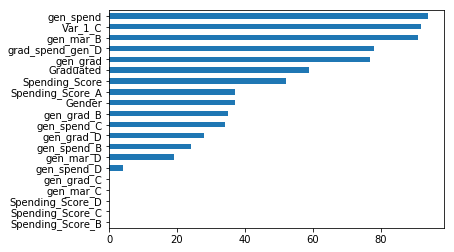

In [82]:
feat_importances = pd.Series(lgbcl.feature_importances_, index=X_t.columns)
#feat_importances.nlargest(30).plot(kind='barh')
feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

In [83]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgbcl = XGBClassifier(max_depth = 3,reg_alpha=1.1,reg_lambda=1)
xgbcl= xgbcl.fit(X_t, y_t,eval_metric="auc")
y_predict = xgbcl.predict(X_tt)
print(xgbcl.score(X_t , y_t))
print(xgbcl.score(X_tt , y_tt))

C:\Users\hp\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\hp\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


0.6334490166914559
0.5458601883986118


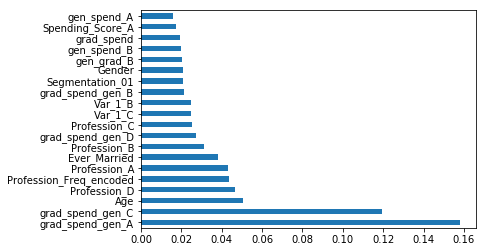

In [84]:
feat_importances = pd.Series(xgbcl.feature_importances_, index=X_t.columns)
feat_importances.nlargest(20).plot(kind='barh')
#feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

In [85]:
xgbcl= xgbcl.fit(train_1, Y)

In [87]:
test_ID=test_1['ID']
test_1=test_1.drop('ID',axis=1)

In [88]:
pred_xgb = xgbcl.predict(test_1)

In [ ]:
lgbcl= lgbcl.fit(train_1, Y)

In [ ]:
train_1.shape
train_1.head()
test_1.head()

In [ ]:
y_predict = lgbcl.predict(test_1)

In [89]:
out_2 = pd.DataFrame({ 'ID':test_ID,'Segmentation_1':pred_xgb}) 
#submission.to_csv("1st_try.csv", index = False)

In [90]:
out_1.head()
out_2.head()
out_1.shape
out_2.shape

,ID,ID_Freq_encoded,Segmentation_output
0,458989,2,B
1,458994,2,C
2,458996,2,A
3,459000,2,C
4,459001,2,C


,ID,Segmentation_1
0,458989,A
1,458994,C
2,458996,B
3,459000,C
4,459001,D


(2627, 3)

(2627, 2)

In [91]:
out=pd.merge(out_1,out_2,how='inner', on='ID')

In [92]:
out.head(30)

,ID,ID_Freq_encoded,Segmentation_output,Segmentation_1
0,458989,2,B,A
1,458994,2,C,C
2,458996,2,A,B
3,459000,2,C,C
4,459001,2,C,D
5,459003,2,C,C
6,459005,1,D,C
7,459008,2,B,C
8,459013,2,C,C
9,459014,2,D,D


In [93]:
out['Segmentation']=out['Segmentation_output'][out['ID_Freq_encoded']==2]
out['Segmentation']=out['Segmentation'].fillna(out['Segmentation_1'])

In [94]:
col=['ID','Segmentation']

In [95]:
output=out[col]

In [96]:
output

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,C
5,459003,C
6,459005,C
7,459008,B
8,459013,C
9,459014,D


In [97]:
output.to_csv("2nd_try.csv", index = False)